# Coastline Datset Comparison
---------

## Introduction

This is based on a blog post on __python4oceanographers__  

(https://ocefpaf.github.io/python4oceanographers/blog/2015/06/22/osm/

Is this notebook various source of coastline as graphically compared for a zoomed-in map.

Note that the Australian government sources are not shown (yet)

### Import required packages

In [1]:
import cartopy.crs as ccrs
import cartopy.io as cio
import cartopy.io.srtm as cis
from cartopy.io.srtm import SRTM3Source
from cartopy.io.srtm import SRTM1Source
from cartopy.io.srtm import SRTMDownloader

from cartopy.io.img_tiles import GoogleTiles

from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



import matplotlib.pyplot as plt
import matplotlib.colors

import numpy as np

import os

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


In [2]:
%matplotlib inline

### Helper Functions

Define a helper function to create a Matplotlib Figure and Axes objects. This ensures each map is identical, except for coastline depiction.

In [4]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

-----------------
## Databases

### A Global Self-consistent, Hierarchical, High-resolution Geography Database

Located at https://www.ngdc.noaa.gov/mgg/shorelines/

This database provides four levels of resolution; we show 

+ "l" = low
+ "i" = intermediate
+ "h" = high

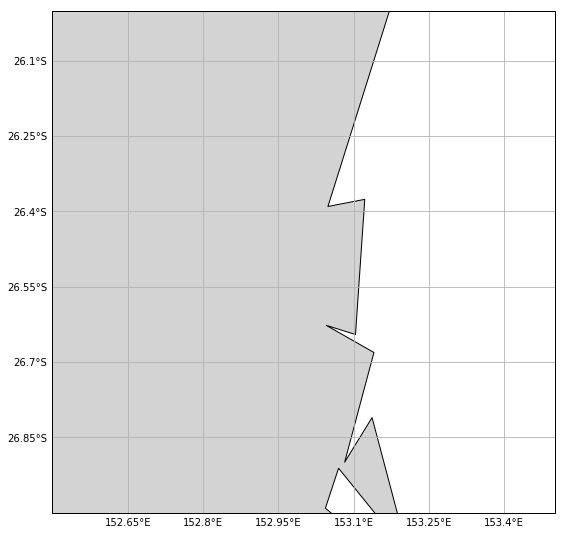

In [5]:
coast_file = 'D:\Water\Coastline\GSHHS_l_L1'

fig,  ax  =  make_map (projection=ccrs.PlateCarree())
ax.set_extent([152.5, 153.5, -27, -26])

shp = shapereader.Reader(coast_file)
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], 
                      ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
#end for

plt.show()

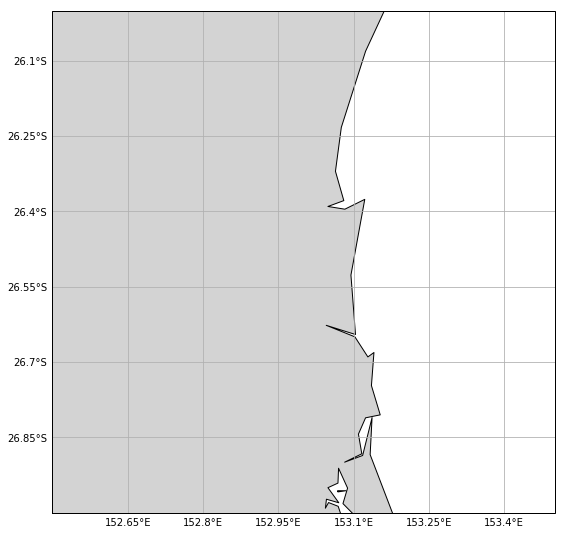

In [9]:
coast_file = 'D:\Water\Coastline\GSHHS_i_L1'

fig,  ax  =  make_map (projection=ccrs.PlateCarree())
ax.set_extent([152.5, 153.5, -27, -26])

shp = shapereader.Reader(coast_file)
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], 
                      ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
#end for

plt.show()

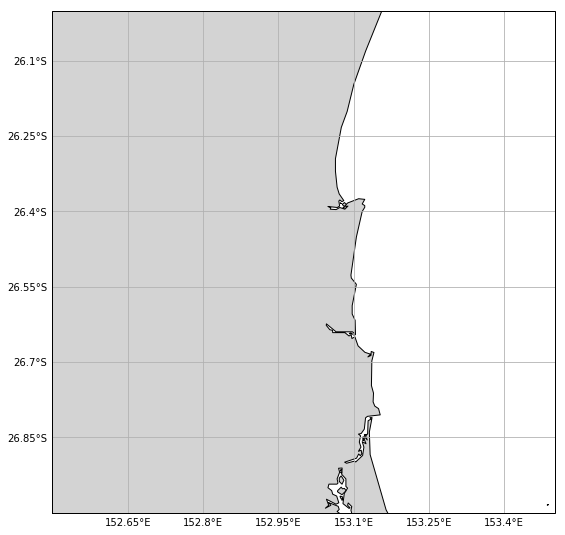

In [10]:
coast_file = 'D:\Water\Coastline\GSHHS_h_L1'

fig,  ax  =  make_map (projection=ccrs.PlateCarree())
ax.set_extent([152.5, 153.5, -27, -26])

shp = shapereader.Reader(coast_file)
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], 
                      ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
#end for

plt.show()

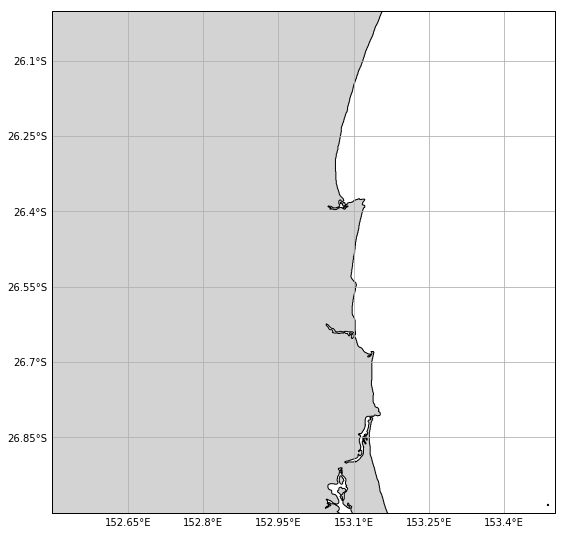

In [14]:
coast_file = 'D:\Water\Coastline\OZ_GSHHS_f_L1'

fig,  ax  =  make_map (projection=ccrs.PlateCarree())
ax.set_extent([152.5, 153.5, -27, -26])

shp = shapereader.Reader(coast_file)
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], 
                      ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
#end for

plt.show()

### Command Line Call to clip shapefiles

```
ogr2ogr -f "ESRI Shapefile" <output>.shp <input>.shp -clipsrc xmin ymin xmax ymax
    ```

-----------------------
## Map Image Tiles for Comparison

### Google
We set zoom level 9

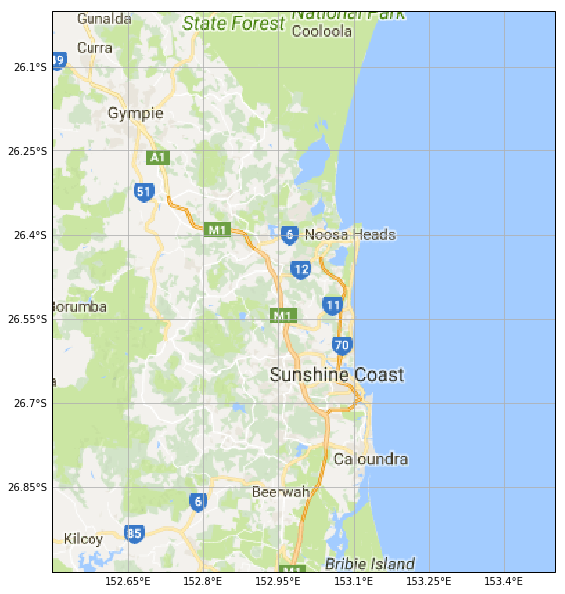

In [11]:

import  cartopy.io.img_tiles  as cimgt

extent = [152.5, 153.5, -27, -26]

request = cimgt.GoogleTiles()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 9)

plt.show()

### Open Street Map Images

Same zoom level

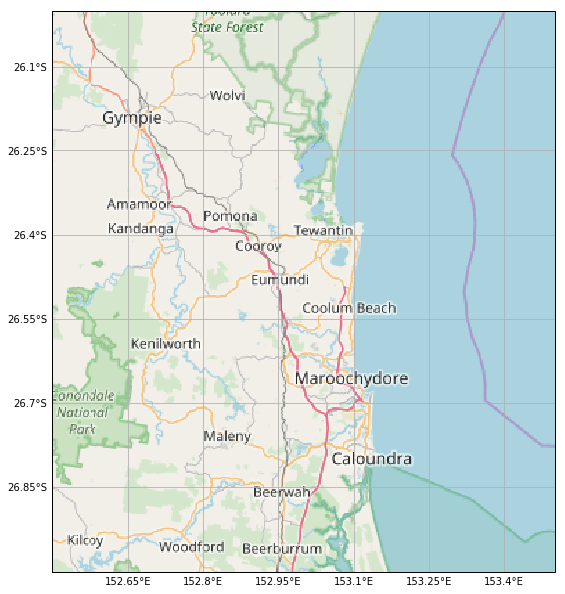

In [13]:
request = cimgt.OSM()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 9)

plt.show()

### Open Street Map Land Polyogons

We have clipped these to Australia.

These are avilable from 

http://openstreetmapdata.com/data

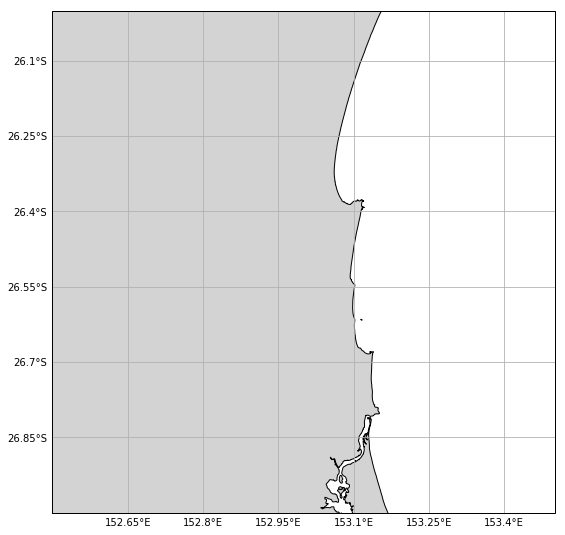

In [16]:
coast_file = 'D:\Water\Coastline\OpenStreetMap\oz_land_polygons'

fig,  ax  =  make_map (projection=ccrs.PlateCarree())
ax.set_extent([152.5, 153.5, -27, -26])

shp = shapereader.Reader(coast_file)
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], 
                      ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
#end for

plt.show()

### Open Street Map Coastlines

The reported difficulties with non-closed polygons also seem to affect Australia, so land is set to 'white', and only plot edges of polygons

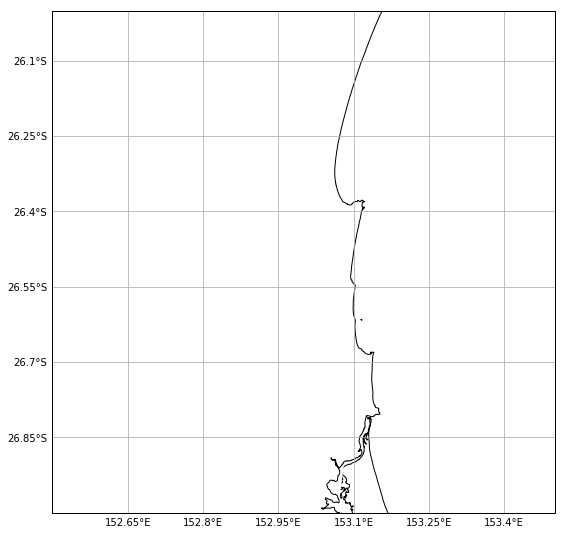

In [20]:
coast_file = 'D:\Water\Coastline\OpenStreetMap\oz_lines'

fig,  ax  =  make_map (projection=ccrs.PlateCarree())
ax.set_extent([152.5, 153.5, -27, -26])

shp = shapereader.Reader(coast_file)
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], 
                      ccrs.PlateCarree(), facecolor='w',
                      edgecolor='black')
#end for

plt.show()

## Qld Government Coastline Data

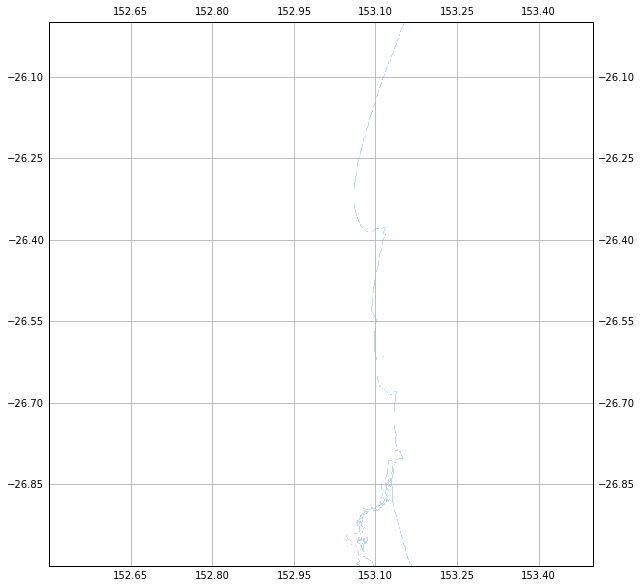

In [23]:
fig = plt.figure(figsize=(10,10) )

ax = fig.add_subplot(1, 1, 1, 
                     projection=ccrs.PlateCarree(), )

water_extent = (152.5, 153.5, -27, -26)
ax.set_extent(water_extent)

URL = 'http://services.ga.gov.au/site_1/services/Shoreline_WM/MapServer/WmsServer?'
layer= 'Shoreline'
ax.add_wms(URL, [layer], alpha=1)

gl = ax.gridlines(draw_labels=True)

plt.show()

----------------------------------------
## Stamen Tiles

"Toner" is supposed to be a very high contrast visualization.

Sadly seems to have some roads enhanced(?)

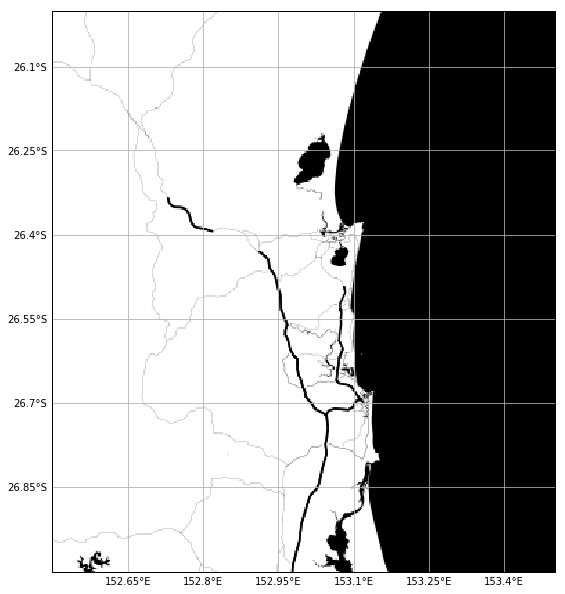

In [7]:
class StamenToner(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = 'http://tile.stamen.com/toner-background/{}/{}/{}.png'.format(z, x, y)
        return url
    #end _image_url
#end StamenToner

imagery = StamenToner()

fig,  ax  =  make_map (projection=imagery.crs)
ax.set_extent([152.5, 153.5, -27, -26])

ax.add_image(imagery, 9)

#end for

plt.show()

### Stamen Terrian Background

Coastline is quite good

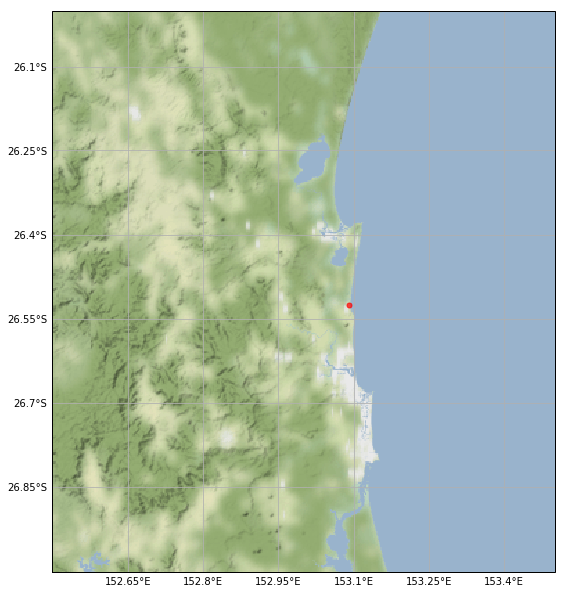

In [9]:
class StamenToner(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = 'http://tile.stamen.com/terrain-background/{}/{}/{}.png'.format(z, x, y)
        return url
    #end _image_url
#end StamenToner

imagery = StamenToner()

fig,  ax  =  make_map (projection=imagery.crs)
ax.set_extent([152.5, 153.5, -27, -26])

ax.add_image(imagery, 9)

# add a marker for home
home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

#end for

plt.show()

### Stamen Watercolor

Very artistic, but not very accurate :)

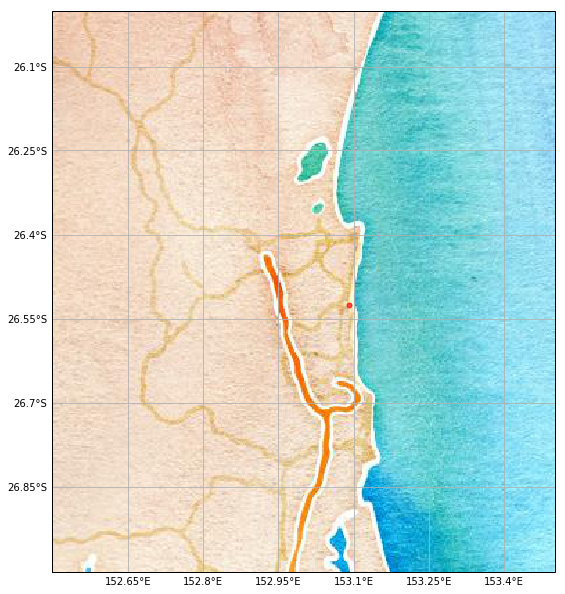

In [12]:
class StamenToner(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = 'http://tile.stamen.com/watercolor/{}/{}/{}.png'.format(z, x, y)
        return url
    #end _image_url
#end StamenToner

imagery = StamenToner()

fig,  ax  =  make_map (projection=imagery.crs)
ax.set_extent([152.5, 153.5, -27, -26])

ax.add_image(imagery, 9)

# add a marker for home
home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

#end for

plt.show()

In [13]:
print(imagery.crs)